>Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Reading data

In [2]:
data = pd.read_csv('weather_data.csv')
data_2 = pd.read_csv('test.csv')
# Self-created data for testing purpose

First 5 rows of test data

In [3]:
data_2.head()

,temperature,windspeed,event
0,33.0,6.5,Rain
1,37.0,9.0,Sunny
2,28.0,14.0,Snow
3,36.0,7.0,Sunny
4,32.0,11.0,Rain


First 5 rows of training data

In [4]:
data.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain


Statistics about the data

In [5]:
data.describe()
# statsitics of data

,temperature,windspeed
count,5.00000,5.000000
mean,33.20000,8.400000
std,4.38178,2.302173
min,28.00000,6.000000
25%,32.00000,7.000000
50%,32.00000,8.000000
75%,34.00000,9.000000
max,40.00000,12.000000


Filling Null values with mean

In [6]:
data['temperature'].fillna(33.2,inplace=True)

In [7]:
data['windspeed'].fillna(8.4,inplace=True)

Again inspecting data

In [8]:
data

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,33.2,9.0,Sunny
2,1/5/2017,28.0,8.4,Snow
3,1/6/2017,33.2,7.0,NaN
4,1/7/2017,32.0,8.4,Rain
5,1/8/2017,33.2,8.4,Sunny
6,1/9/2017,33.2,8.4,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


Dependent variable analysis

In [9]:
data['event'].value_counts()

Sunny     3
Rain      2
Cloudy    1
Snow      1
Name: event, dtype: int64

Filling null values with 'Sunny', as it is median

In [10]:
data['event'].fillna('Sunny',inplace=True)

In [11]:
data

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,33.2,9.0,Sunny
2,1/5/2017,28.0,8.4,Snow
3,1/6/2017,33.2,7.0,Sunny
4,1/7/2017,32.0,8.4,Rain
5,1/8/2017,33.2,8.4,Sunny
6,1/9/2017,33.2,8.4,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


Now we have complete Data!

Encoding Categorical Data --> Output variable is categorical and thus, needed to be encoded.

In [12]:
replace_map = {'event': {'Sunny': 1, 'Rain': 2, 'Snow': 3, 'Cloudy': 4}}

In [13]:
labels = data['event'].astype('category').cat.categories.tolist()
replace_map_comp = {'event' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'event': {'Cloudy': 1, 'Rain': 2, 'Snow': 3, 'Sunny': 4}}


This is now the encoding....<br>
**
1: Cloudy
2: Rain
3: Snow
4: Sunny**

Copying original data, so that no changes should be done in the same.

In [14]:
data_new = data.copy()
data_new_2 = data_2.copy()

In [15]:
data_new.replace(replace_map_comp, inplace=True)
data_new_2.replace(replace_map_comp, inplace=True)

Deleting 'day' column, as it is not showing any valueable Trends.

In [16]:
del data_new['day']

In [17]:
data_new

,temperature,windspeed,event
0,32.0,6.0,2
1,33.2,9.0,4
2,28.0,8.4,3
3,33.2,7.0,4
4,32.0,8.4,2
5,33.2,8.4,4
6,33.2,8.4,4
7,34.0,8.0,1
8,40.0,12.0,4


Heatmap --> Correlation between variables

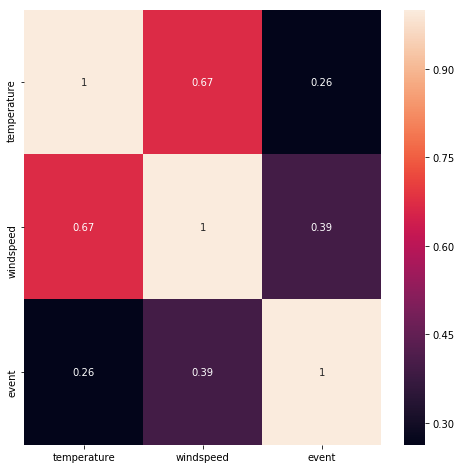

In [18]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data_new.corr(),annot=True)
# finding the correlation between features

Countplot --> Similar to Barplot

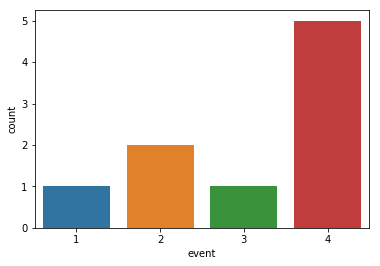

In [19]:
sns.countplot('event',data=data_new)

Pairplot --> For comapring two variables at a time, but will compare all.

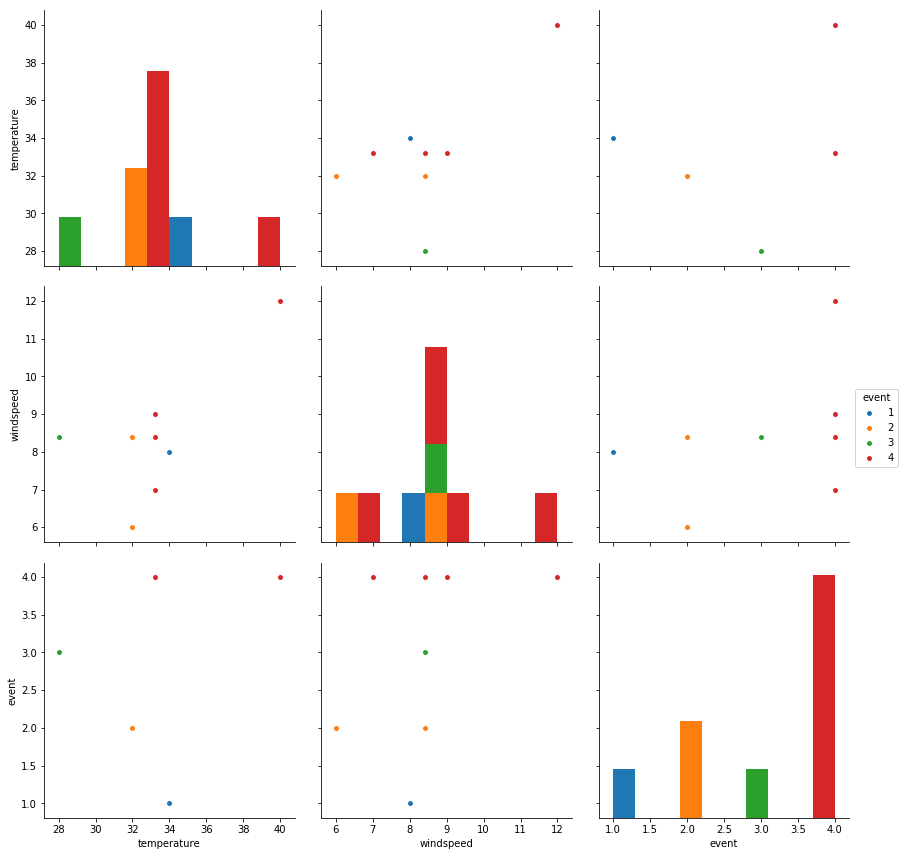

In [20]:
sns.pairplot(data_new,hue='event',size=4)

>Facetgrid(with kernel density estimation):-<br> Estimates the PDF for a distribution (probabilty of occurence of some value in the given curve)

C:\Users\a\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\a\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


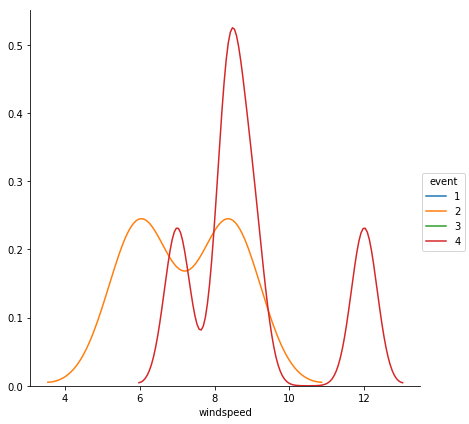

In [21]:
sns.FacetGrid(data_new, hue="event", size=6).map(sns.kdeplot, "windspeed").add_legend()

Regplot --> Gives the regression line for the data values

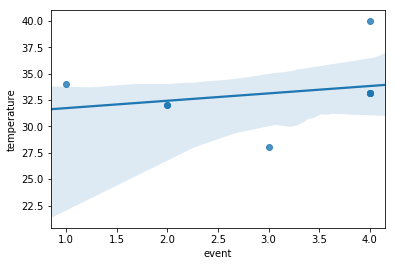

In [22]:
sns.regplot('event','temperature',data=data_new)

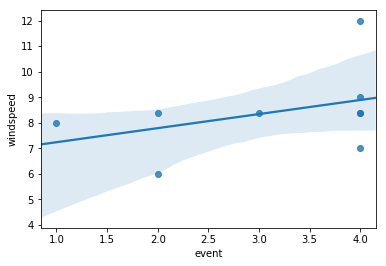

In [23]:
sns.regplot('event','windspeed',data=data_new)

**MACHINE LEARNING**

Input vs Output training data

In [24]:
X=data_new.iloc[:,:2].values
y=data_new.iloc[:,-1].values

Input vs Output testing data

In [25]:
X_test=data_new_2.iloc[:,:2].values
y_test=data_new_2.iloc[:,-1].values

**LOGISTIC REGRESSION**

>Because there is not enough data to apply any other algorithm, the best suited is Logistic Regression.<br>
(Categorical variable is output variable: CLASSIFICATION)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,y)
y_pred=classifier.predict(X_test)

>ACCURACY measures

In [27]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.6666666666666666


Less Accuracy --> Because there was lot of data incomplete, we just filled it and nothing much was there to be known for, as there is very less data available.

**<font size="5">COMPLETED! Thanks.</font>**